In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fight_details_file = pd.read_csv('../data/ufc_data.csv')

columns = [
  'event_name',
  'event_date',
  'red_name',
  'red_total_landed_sig_str',
  'blue_name',
  'blue_total_landed_sig_str'
]

df = fight_details_file[columns]

df.loc[:,'event_date'] = pd.to_datetime(df.loc[:,'event_date'])

df


<BarContainer object of 28 artists>

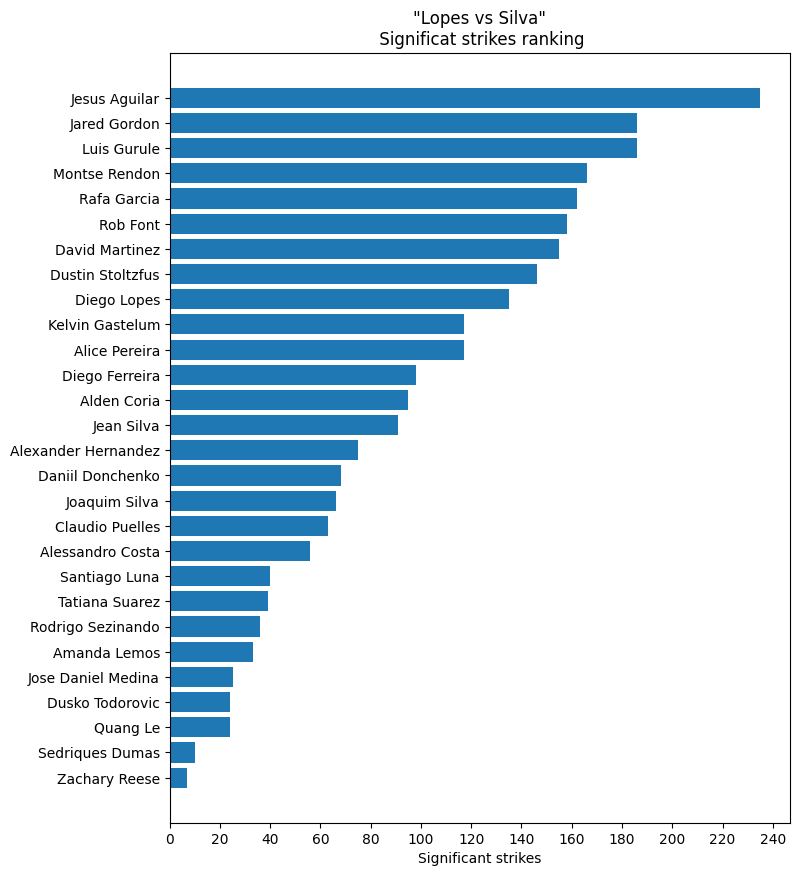

In [66]:
import numpy as np

ls_df = df[df['event_name'] == 'UFC Fight Night: Lopes vs. Silva']
fighters_df = pd.melt(
  ls_df,
  id_vars=['event_name', 'event_date'],
  value_vars=['red_name', 'blue_name'],
  var_name='corner',
  value_name='fighter'
)

strikes_df = pd.melt(
  ls_df,
  id_vars=['event_name', 'event_date'],
  value_vars=['red_total_landed_sig_str', 'blue_total_landed_sig_str'],
  var_name='corner',
  value_name='strikes'
)

lopes_silva = pd.concat([fighters_df[['event_name', 'event_date', 'fighter']], strikes_df['strikes']], axis=1).sort_values(by='strikes')

fig, ax = plt.subplots(figsize=(8,10))

plt.xticks(np.arange(0, max(lopes_silva['strikes'])+10, 20))
ax.set_xlabel('Significant strikes')
ax.set_title('"Lopes vs Silva"\n Significat strikes ranking')
ax.barh(lopes_silva['fighter'], lopes_silva['strikes'])
